# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> (actors)
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> (genres)
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> (movie actors)
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> (movie ratings)

# Content


**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [74]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [2]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, import the installed packages from the previous block below.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [4]:
# The data comes from https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
genres = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
movie_actors = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
movie_ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Actors

Display the schema below:

In [6]:
actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [7]:
actors.select("primaryName", "birthYear", "deathYear", "knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

# Genres

Display the first 10 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [8]:
genres.select("titleType", "primaryTitle", "genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

Display the unique categories below:

In [9]:
genres.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

In [10]:
genres.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

# Movie Actors

Display the schema below:

In [11]:
movie_actors.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 10 rows below:

In [12]:
movie_actors.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

# Movie Ratings

Display the schema below:

In [13]:
movie_ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

In [14]:
from pyspark.sql.functions import col
movie_ratings.sort(col("numVotes").desc()).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt2032572|          5.2|    9991|
|tt8860450|          6.3|    9991|
|tt3244036|          8.3|     999|
|tt1739480|          6.9|     999|
|tt1859607|          5.3|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [14]:
row = actors.count()
col = len(actors.columns)
print(f'Number of Columns in Actors table: {col}')
print(f'Number of Rows in Actors table: {row}') 

row = genres.count()
col = len(genres.columns)
print(f'Number of Columns in Genres table: {col}')
print(f'Number of Rows in Genres table: {row}')  

row = movie_actors.count()
col = len(movie_actors.columns)
print(f'Number of Columns in Movie Actors table: {col}')
print(f'Number of Rows in Movie Actors table: {row}')

row = movie_ratings.count()
col = len(movie_ratings.columns)
print(f'Number of Columns in Movie Ratings table: {col}')
print(f'Number of Rows in Movie Ratings table: {row}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Columns in Actors table: 6
Number of Rows in Actors table: 9706922
Number of Columns in Genres table: 9
Number of Rows in Genres table: 6321302
Number of Columns in Movie Actors table: 6
Number of Rows in Movie Actors table: 36468817
Number of Columns in Movie Ratings table: 3
Number of Rows in Movie Ratings table: 993153

# Part 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

# Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [15]:
genres.select("tconst", "titleType", "genres").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

In [16]:
from pyspark.sql.functions import split, col, explode

# pyspark.sql.functions.explode(col) Returns a new row for each element in the given array or map. 

genres.select("tconst", "titleType", "genres").withColumn("genres",explode(split("genres",","))).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|     genres|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

# Total unique Genres

**What is the total number of unique genres available in the movie category?**

In [17]:
genres.filter(genres.titleType == "movie").select("genres").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1429

**What are the unique genres available?**

In [18]:
genres.select('genres').withColumn('genres',explode(split("genres",","))).distinct().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

**Oops! Something is off!**

In [19]:
from pyspark.sql.functions import col
nll = '\\N'
genres.select("genres").withColumn('genres',explode(split("genres",","))).distinct().filter(col("genres") != nll).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

In [20]:
from pyspark.sql.functions import col
nll = '\\N'
genres.select("genres").withColumn('genres',explode(split("genres",","))).distinct().filter(col("genres") != nll).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

# Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

# Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes(movie ratings and genres) by tconst

In [34]:
nll = '\\N'
genre_avg_rating = genres.join(movie_ratings, on = ["tconst"], how = "inner") \
                    .withColumn("genres", explode(split('genres', ","))) \
                    .where(genres.titleType == "movie") \
                    .filter(col("genres")!= nll)
genre_avg_rating.select("genres", "averageRating").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|   genres|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

In [35]:
from pyspark.sql.functions import avg, mean, count, sum, col, max
nll = '\\N'
genre_and_avgrating = genres.join(movie_ratings, on = ["tconst"], how = "inner") \
                            .withColumn("genres", explode(split('genres', ","))) \
                            .where(genres.titleType == "movie") \
                            .filter(col("genres")!= nll)\
                            .groupBy("genres").agg(avg("averageRating")).alias("avg_rating")
genre_and_avgrating.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|avg(averageRating)|
+-----------+------------------+
|    Mystery| 5.940437535981576|
|    Musical|6.2032460545193695|
|     Action|  5.71873406966865|
|      Sport| 6.600145190562612|
|  Talk-Show|               5.8|
|    Romance| 6.125714180397362|
|   Thriller|5.6259675664473345|
| Reality-TV| 6.379310344827585|
|     Family| 6.250560452715202|
|    Fantasy| 5.924820762833381|
|    History| 6.822718115605145|
|  Animation| 6.326203750633554|
|  Film-Noir| 6.636246786632392|
|      Short|              7.26|
|     Sci-Fi| 5.325150008571917|
|       News|7.2009160305343505|
|      Drama| 6.288080210387904|
|Documentary| 7.245469798657718|
|    Western| 5.948970989337961|
|     Comedy| 5.941363108004129|
+-----------+------------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [36]:
from pyspark.sql.functions import avg, mean, count, sum, col, max

hbar_chart = genre_and_avgrating.sort(col("avg(averageRating)").desc())
hbar_chart.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|     genres|avg(averageRating)|
+-----------+------------------+
|      Short|              7.26|
|Documentary| 7.245469798657718|
|       News|7.2009160305343505|
|  Biography|6.9836376404494365|
|  Game-Show|             6.975|
|    History| 6.822718115605146|
|      Music| 6.752020202020201|
|  Film-Noir| 6.636246786632391|
|      Sport| 6.600145190562615|
|        War| 6.483807030665668|
| Reality-TV| 6.379310344827586|
|  Animation| 6.326203750633553|
|      Drama| 6.288080210387904|
|     Family| 6.250560452715201|
|    Musical|6.2032460545193695|
|    Romance| 6.125714180397362|
|      Crime| 6.026013332684541|
|    Western| 5.948970989337963|
|     Comedy| 5.941363108004129|
|    Mystery| 5.940437535981577|
+-----------+------------------+
only showing top 20 rows

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
#converting columsn to floats
hbar_chart = hbar_chart.withColumn("genres", col("genres").cast("float"))\
    .withColumn("avg(averageRating)", col("avg(averageRating)").cast("float")).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 8))
hbar_chart.sort('genres',inplace=True)
ax = hbar_chart.toPandas().plot.barh(color='m')
ax.set_title('Top Genres in The Movie Category')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Genre')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'int' object has no attribute 'sort'
Traceback (most recent call last):
AttributeError: 'int' object has no attribute 'sort'



## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [32]:
movie_actors.select("tconst", "category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [41]:
movie_actors.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

**What are the unique job categories available?**

In [42]:
movie_actors.select("category").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

Now let's find the top job categories in this dataset by rolling up categories.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [43]:
from pyspark.sql.functions import col
movie_actors.groupBy(col("category")).count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [44]:
from pyspark.sql.functions import avg, mean, count, sum, col, max

bar_chart = movie_actors.groupBy(col("category")).count()
bar_chart.sort(col("count").desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

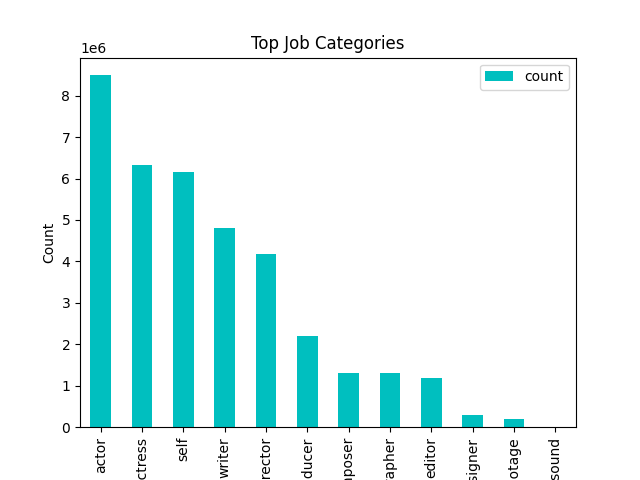

In [45]:
from pyspark.sql.functions import avg, mean, count, sum, col, max
import matplotlib.pyplot as plt
import pandas as pd

bar_chart = movie_actors.groupBy(col("category")).count()
new_barchart = bar_chart.sort(col("count").desc())
ax = new_barchart.toPandas().plot.bar(x = 'category', color='c')
ax.set_title('Top Job Categories')
ax.set_xlabel('Job Categories')
ax.set_ylabel('Count')
%matplot plt

# PART 4 - Answer to the following questions:


## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

First join actors, genres, and movie actors on each other

In [46]:
df = genres.join(movie_actors, on = ["tconst"], how = "inner").join(actors, on =["nconst"], how = "inner")
df.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+--------+--------+---+--------------------+-----------+---------+---------+--------------------+--------------------+
|   nconst|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|         genres|ordering|category|job|          characters|primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+--------+--------+---+--------------------+-----------+---------+---------+--------------------+--------------------+
|nm0000198|tt1345836|    movie|The Dark Knight R...|The Dark Knight R...|      0|     2012|     \N|           164|Action,Thriller|       4|   actor| \N|["Commissioner Go...|Gary Oldman|     1958|       \N|actor,soundtrack,...|tt0103874,tt13408...|
+-------

In [47]:
#creating 2 dataframes with Johnny Depp and Carter movies
df_Depp = df.select("primaryTitle").filter(df.titleType == "movie").filter(actors.primaryName == "Johnny Depp")
df_Carter =  df.select("primaryTitle").filter(df.titleType == "movie").filter(actors.primaryName == "Helena Bonham Carter")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
df_all = df_Depp.join(df_Carter, on = ["primaryTitle"], how = "inner").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

In [49]:
from pyspark.sql.functions import col
df.select("primaryTitle", "startYear")\
    .withColumn("startYear", col("startYear").cast("int"))\
    .filter(genres.titleType == "movie")\
    .filter(actors.primaryName == "Brad Pitt")\
    .filter(genres.startYear > 2010)\
    .sort(col("startYear").desc())\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Kajillionaire                    |2020     |
|Irresistible                     |2020     |
|The King                         |2019     |
|Ad Astra                         |2019     |
|Once Upon a Time ... in Hollywood|2019     |
|Vice                             |2018     |
|War Machine                      |2017     |
|Allied                           |2016     |
|Voyage of Time: Life's Journey   |2016     |
|By the Sea                       |2015     |
|Hitting the Apex                 |2015     |
|The Big Short                    |2015     |
|Fury                             |2014     |
|Kick-Ass 2                       |2013     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [50]:
nll = '\\N'
df.select("startYear")\
    .filter(df.titleType == "movie")\
    .filter(df.startYear != nll)\
    .filter(actors.primaryName == "Zendaya")\
    .groupBy("startYear").agg(count("startYear")).alias("count")\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------------+
|startYear|count(startYear)|
+---------+----------------+
|2020     |1               |
|2018     |2               |
|2017     |1               |
+---------+----------------+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [51]:
from pyspark.sql.functions import avg, mean, count, sum, col, max 
nll = '\\N'
genres.join(movie_ratings, on = ["tconst"], how = "inner")\
    .select("PrimaryTitle", "averageRating")\
    .withColumn("averageRating" , col("averageRating").cast("float"))\
    .filter(movie_ratings.averageRating != nll)\
    .filter(genres.titleType == "movie")\
    .filter((movie_ratings.averageRating > 9.7) & (genres.startYear == 2019))\
    .sort(col("averageRating").desc())\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|PrimaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|Our Scripted Life                                |10.0         |
|Kirket                                           |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Love in Kilnerry                                 |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|A Grunt's Life                                   |10.0         |
|The Cardinal                                     |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|Superhombre                                      |9.9          |
|Kamen Rid

## Extra Credit - Analysis of your choice

Try and analyze some interesting dimension to this data. You should specify the question in your Project2_Analysis.ipynb. 

You must join at least two datasets.



## 1) Which movie genres had a rating of 10 in 2019?

In [52]:
from pyspark.sql.functions import avg, mean, count, sum, col, max 
nll = '\\N'
genres.join(movie_ratings, on = ["tconst"], how = "inner")\
    .select("genres", "averageRating")\
    .withColumn("averageRating" , col("averageRating").cast("float"))\
    .withColumn('genres',explode(split("genres",","))).distinct()\
    .filter(movie_ratings.averageRating != nll)\
    .filter(genres.titleType == "movie")\
    .filter((movie_ratings.averageRating > 9.9) & (genres.startYear == 2019))\
    .sort(col("averageRating").desc())\
    .show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------+
|genres |averageRating|
+-------+-------------+
|Fantasy|10.0         |
|Crime  |10.0         |
+-------+-------------+